Version 1: Dual-scale heatmaps with signed, diverging colors


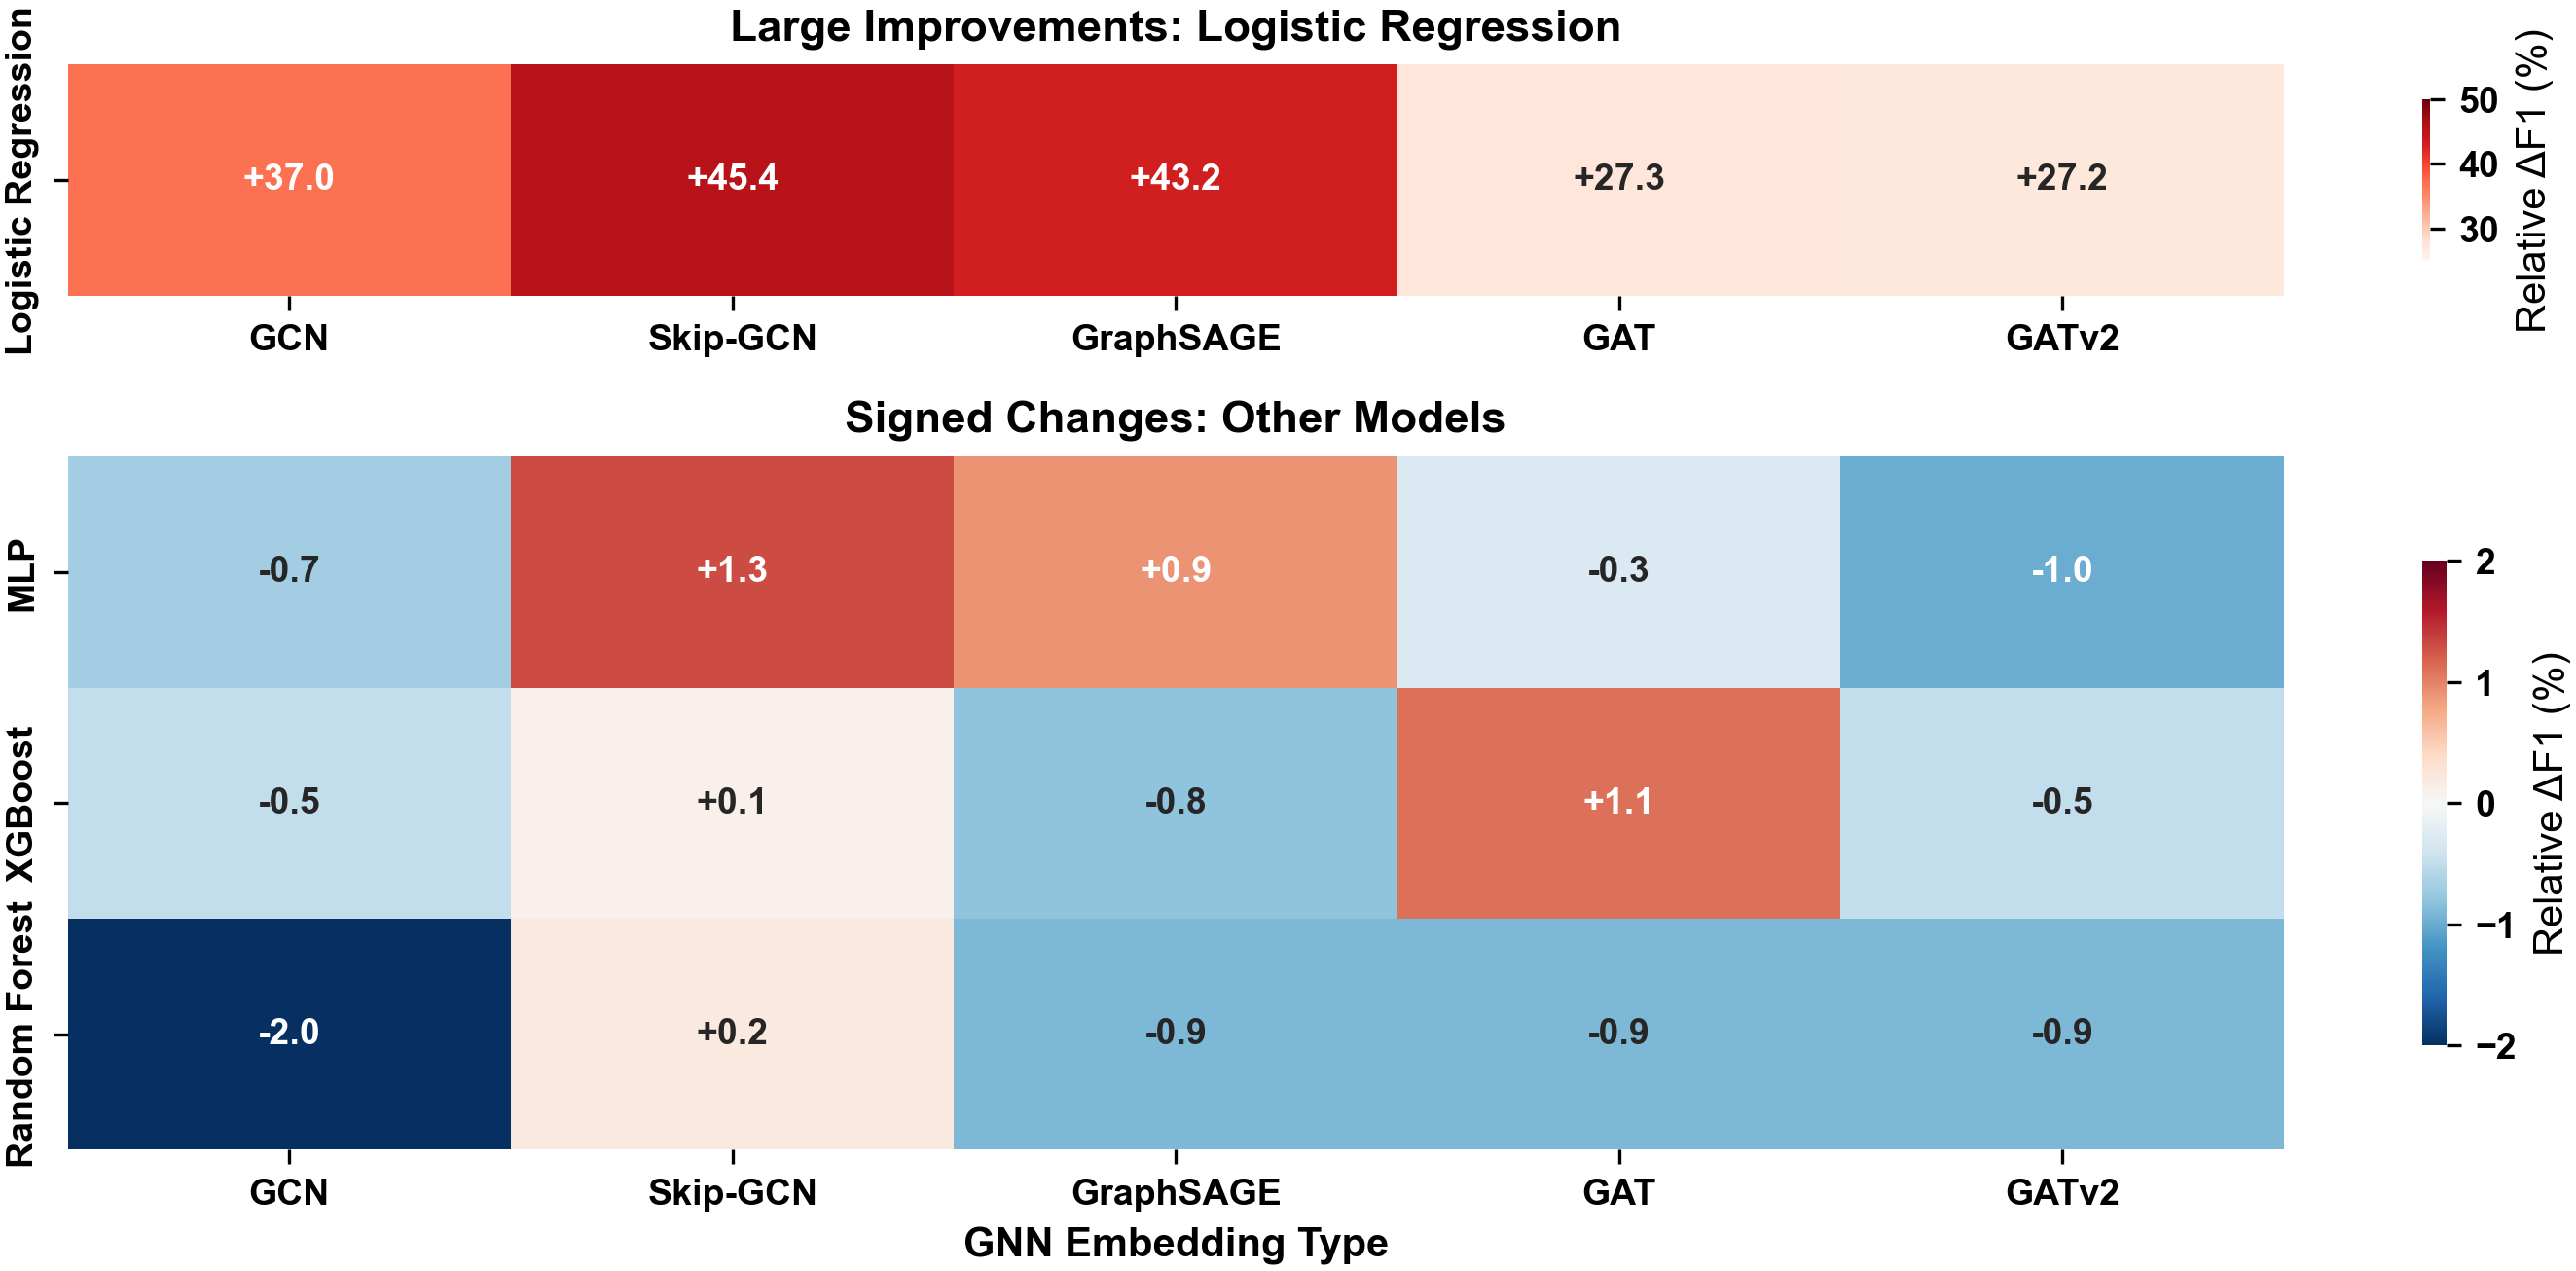

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from pathlib import Path

def plot_improved_heatmap(
    save_path="figures/improvements_heatmaps.png",
    dpi=300,
    also_svg=False,
    also_pdf=False
):
    baseline_models = ['Logistic Regression', 'MLP', 'XGBoost', 'Random Forest']
    gnn_embeddings = ['GCN', 'Skip-GCN', 'GraphSAGE', 'GAT', 'GATv2']
    
    # Correct, signed relative improvements (%)
    improvements = [
        [37.0, 45.4, 43.2, 27.3, 27.2],   # Logistic Regression
        [-0.7,  1.3,  0.9, -0.3, -1.0],   # MLP
        [-0.5,  0.1, -0.8,  1.1, -0.5],   # XGBoost
        [-2.0,  0.2, -0.9, -0.9, -0.9],   # Random Forest
    ]
    
    # Build signed string annotations (with explicit +/-)
    def signed_annot(arr):
        arr = np.asarray(arr, dtype=float)
        fmt = np.vectorize(lambda x: f"{x:+.1f}")
        return fmt(arr)
    
    fig, (ax1, ax2) = plt.subplots(
        2, 1,
        figsize=(10, 4.8),
        height_ratios=[1, 3],
        constrained_layout=False
    )
    plt.subplots_adjust(hspace=0.30)

    # -------------------------
    # Top heatmap (LR only)
    # -------------------------
    log_reg_data = np.array([improvements[0]], dtype=float)
    sns.heatmap(
        log_reg_data,
        xticklabels=gnn_embeddings,
        yticklabels=['Logistic Regression'],
        annot=signed_annot(log_reg_data), fmt='',
        cmap='Reds',           # all positive -> sequential is fine
        vmin=25, vmax=50,      # tight to your LR range for good contrast
        annot_kws={"size": 9},
        cbar_kws={'label': 'Relative ΔF1 (%)', 'shrink': 0.7},
        ax=ax1
    )
    ax1.set_title('Large Improvements: Logistic Regression', fontweight='bold', pad=6)
    ax1.set_xlabel('')

    # -------------------------
    # Bottom heatmap (others)
    # Use a diverging colormap centered at 0 with symmetric limits
    # -------------------------
    other_models_data = np.array(improvements[1:], dtype=float)
    other_model_names = baseline_models[1:]

    # symmetric limits around zero for meaningful color comparison
    max_abs = np.nanmax(np.abs(other_models_data))
    vlim = float(np.ceil(max_abs * 10) / 10.0)  # round up to nearest 0.1
    norm = TwoSlopeNorm(vmin=-vlim, vcenter=0.0, vmax=vlim)

    sns.heatmap(
        other_models_data,
        xticklabels=gnn_embeddings,
        yticklabels=other_model_names,
        annot=signed_annot(other_models_data), fmt='',
        cmap='RdBu_r',         # blue = negative, red = positive
        norm=norm,             # center at 0 with symmetric limits
        annot_kws={"size": 9},
        cbar_kws={'label': 'Relative ΔF1 (%)', 'shrink': 0.7},
        ax=ax2
    )
    ax2.set_title('Signed Changes: Other Models', fontweight='bold', pad=6)
    ax2.set_xlabel('GNN Embedding Type', fontweight='bold')

    # Layout & save
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")
    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, (ax1, ax2)

# Run
if __name__ == "__main__":
    print("Version 1: Dual-scale heatmaps with signed, diverging colors")
    plot_improved_heatmap(
        save_path="figures/improvements_heatmaps.png",
        dpi=300,
        also_svg=True
    )


Version 1: Dual-scale heatmaps with signed, diverging colors


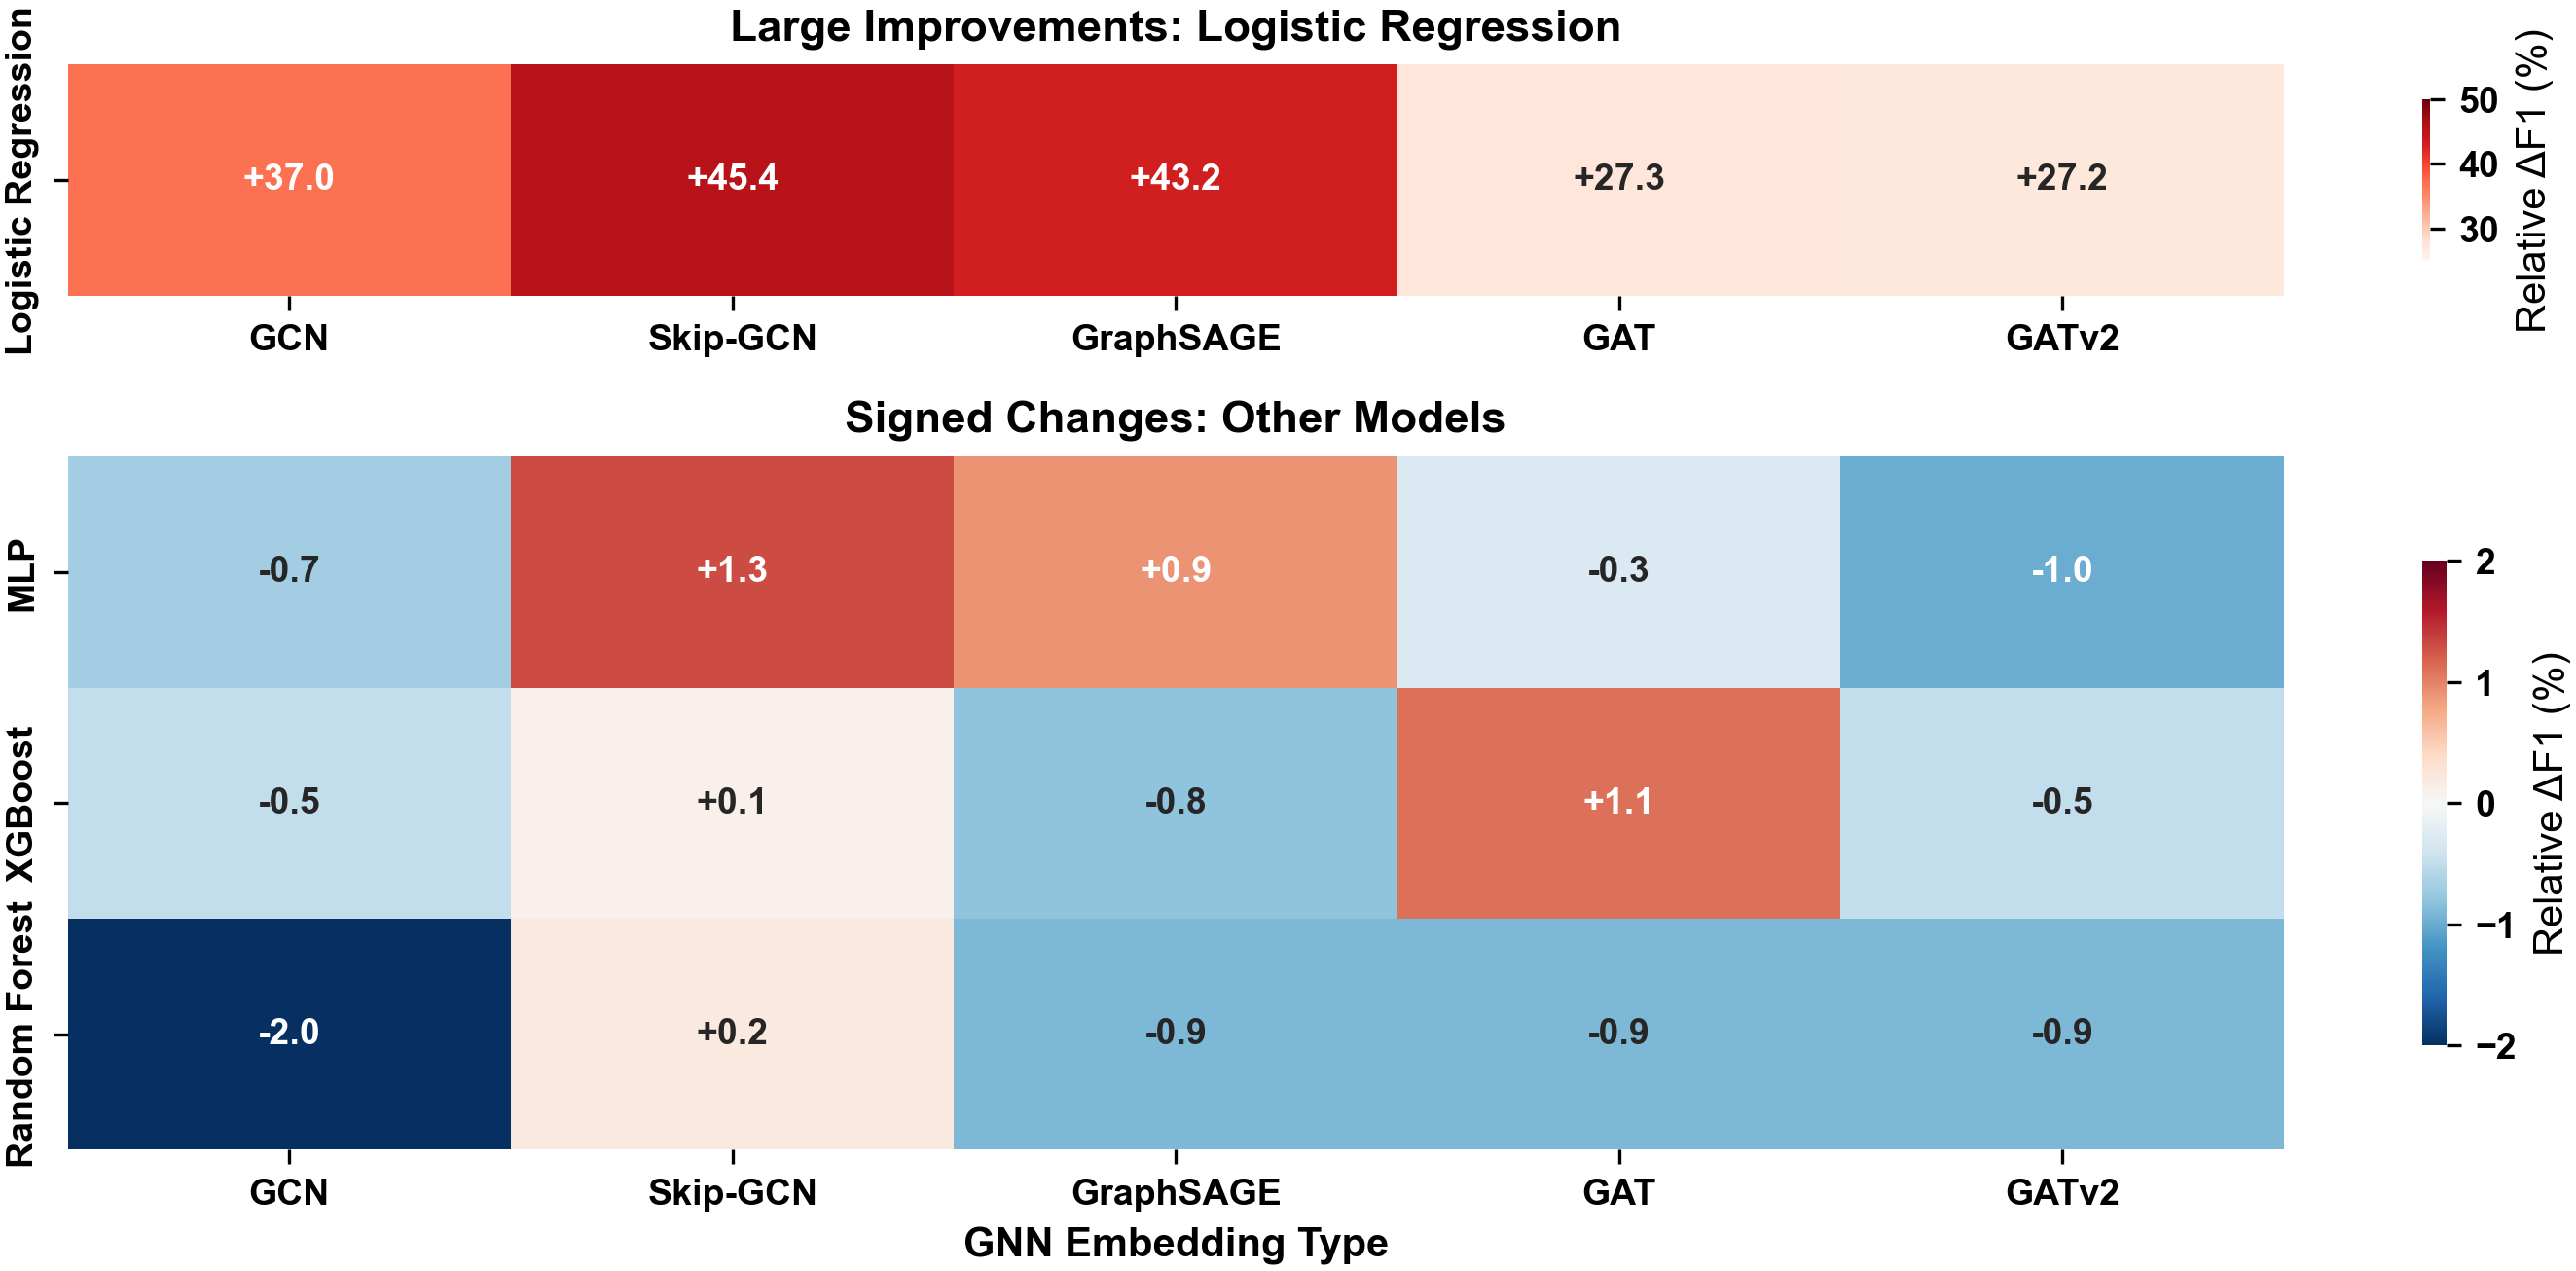

In [226]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from pathlib import Path

def plot_improved_heatmap(
    save_path="figures/improvements_heatmaps.png",
    dpi=300,
    also_svg=False,
    also_pdf=False
):
    baseline_models = ['Logistic Regression', 'MLP', 'XGBoost', 'Random Forest']
    gnn_embeddings = ['GCN', 'Skip-GCN', 'GraphSAGE', 'GAT', 'GATv2']
    
    # Correct, signed relative improvements (%)
    improvements = [
        [37.0, 45.4, 43.2, 27.3, 27.2],   # Logistic Regression
        [-0.7,  1.3,  0.9, -0.3, -1.0],   # MLP
        [-0.5,  0.1, -0.8,  1.1, -0.5],   # XGBoost
        [-2.0,  0.2, -0.9, -0.9, -0.9],   # Random Forest
    ]
    
    # Build signed string annotations (with explicit +/-)
    def signed_annot(arr):
        arr = np.asarray(arr, dtype=float)
        fmt = np.vectorize(lambda x: f"{x:+.1f}")
        return fmt(arr)
    
    fig, (ax1, ax2) = plt.subplots(
        2, 1,
        figsize=(10, 4.8),
        height_ratios=[1, 3],
        constrained_layout=False
    )
    plt.subplots_adjust(hspace=0.30)

    # -------------------------
    # Top heatmap (LR only)
    # -------------------------
    log_reg_data = np.array([improvements[0]], dtype=float)
    sns.heatmap(
        log_reg_data,
        xticklabels=gnn_embeddings,
        yticklabels=['Logistic Regression'],
        annot=signed_annot(log_reg_data), fmt='',
        cmap='Reds',           # all positive -> sequential is fine
        vmin=25, vmax=50,      # tight to your LR range for good contrast
        annot_kws={"size": 9},
        cbar_kws={'label': 'Relative ΔF1 (%)', 'shrink': 0.7},
        ax=ax1
    )
    ax1.set_title('Large Improvements: Logistic Regression', fontweight='bold', pad=6)
    ax1.set_xlabel('')

    # -------------------------
    # Bottom heatmap (others)
    # Use a diverging colormap centered at 0 with symmetric limits
    # -------------------------
    other_models_data = np.array(improvements[1:], dtype=float)
    other_model_names = baseline_models[1:]

    # symmetric limits around zero for meaningful color comparison
    max_abs = np.nanmax(np.abs(other_models_data))
    vlim = float(np.ceil(max_abs * 10) / 10.0)  # round up to nearest 0.1
    norm = TwoSlopeNorm(vmin=-vlim, vcenter=0.0, vmax=vlim)

    sns.heatmap(
        other_models_data,
        xticklabels=gnn_embeddings,
        yticklabels=other_model_names,
        annot=signed_annot(other_models_data), fmt='',
        cmap='RdBu_r',         # blue = negative, red = positive
        norm=norm,             # center at 0 with symmetric limits
        annot_kws={"size": 9},
        cbar_kws={'label': 'Relative ΔF1 (%)', 'shrink': 0.7},
        ax=ax2
    )
    ax2.set_title('Signed Changes: Other Models', fontweight='bold', pad=6)
    ax2.set_xlabel('GNN Embedding Type', fontweight='bold')

    # Layout & save
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")
    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, (ax1, ax2)

# Run
if __name__ == "__main__":
    print("Version 1: Dual-scale heatmaps with signed, diverging colors")
    plot_improved_heatmap(
        save_path="figures/improvements_heatmaps.png",
        dpi=300,
        also_svg=True
    )


Version 1: Dual-scale heatmaps with signed, diverging colors


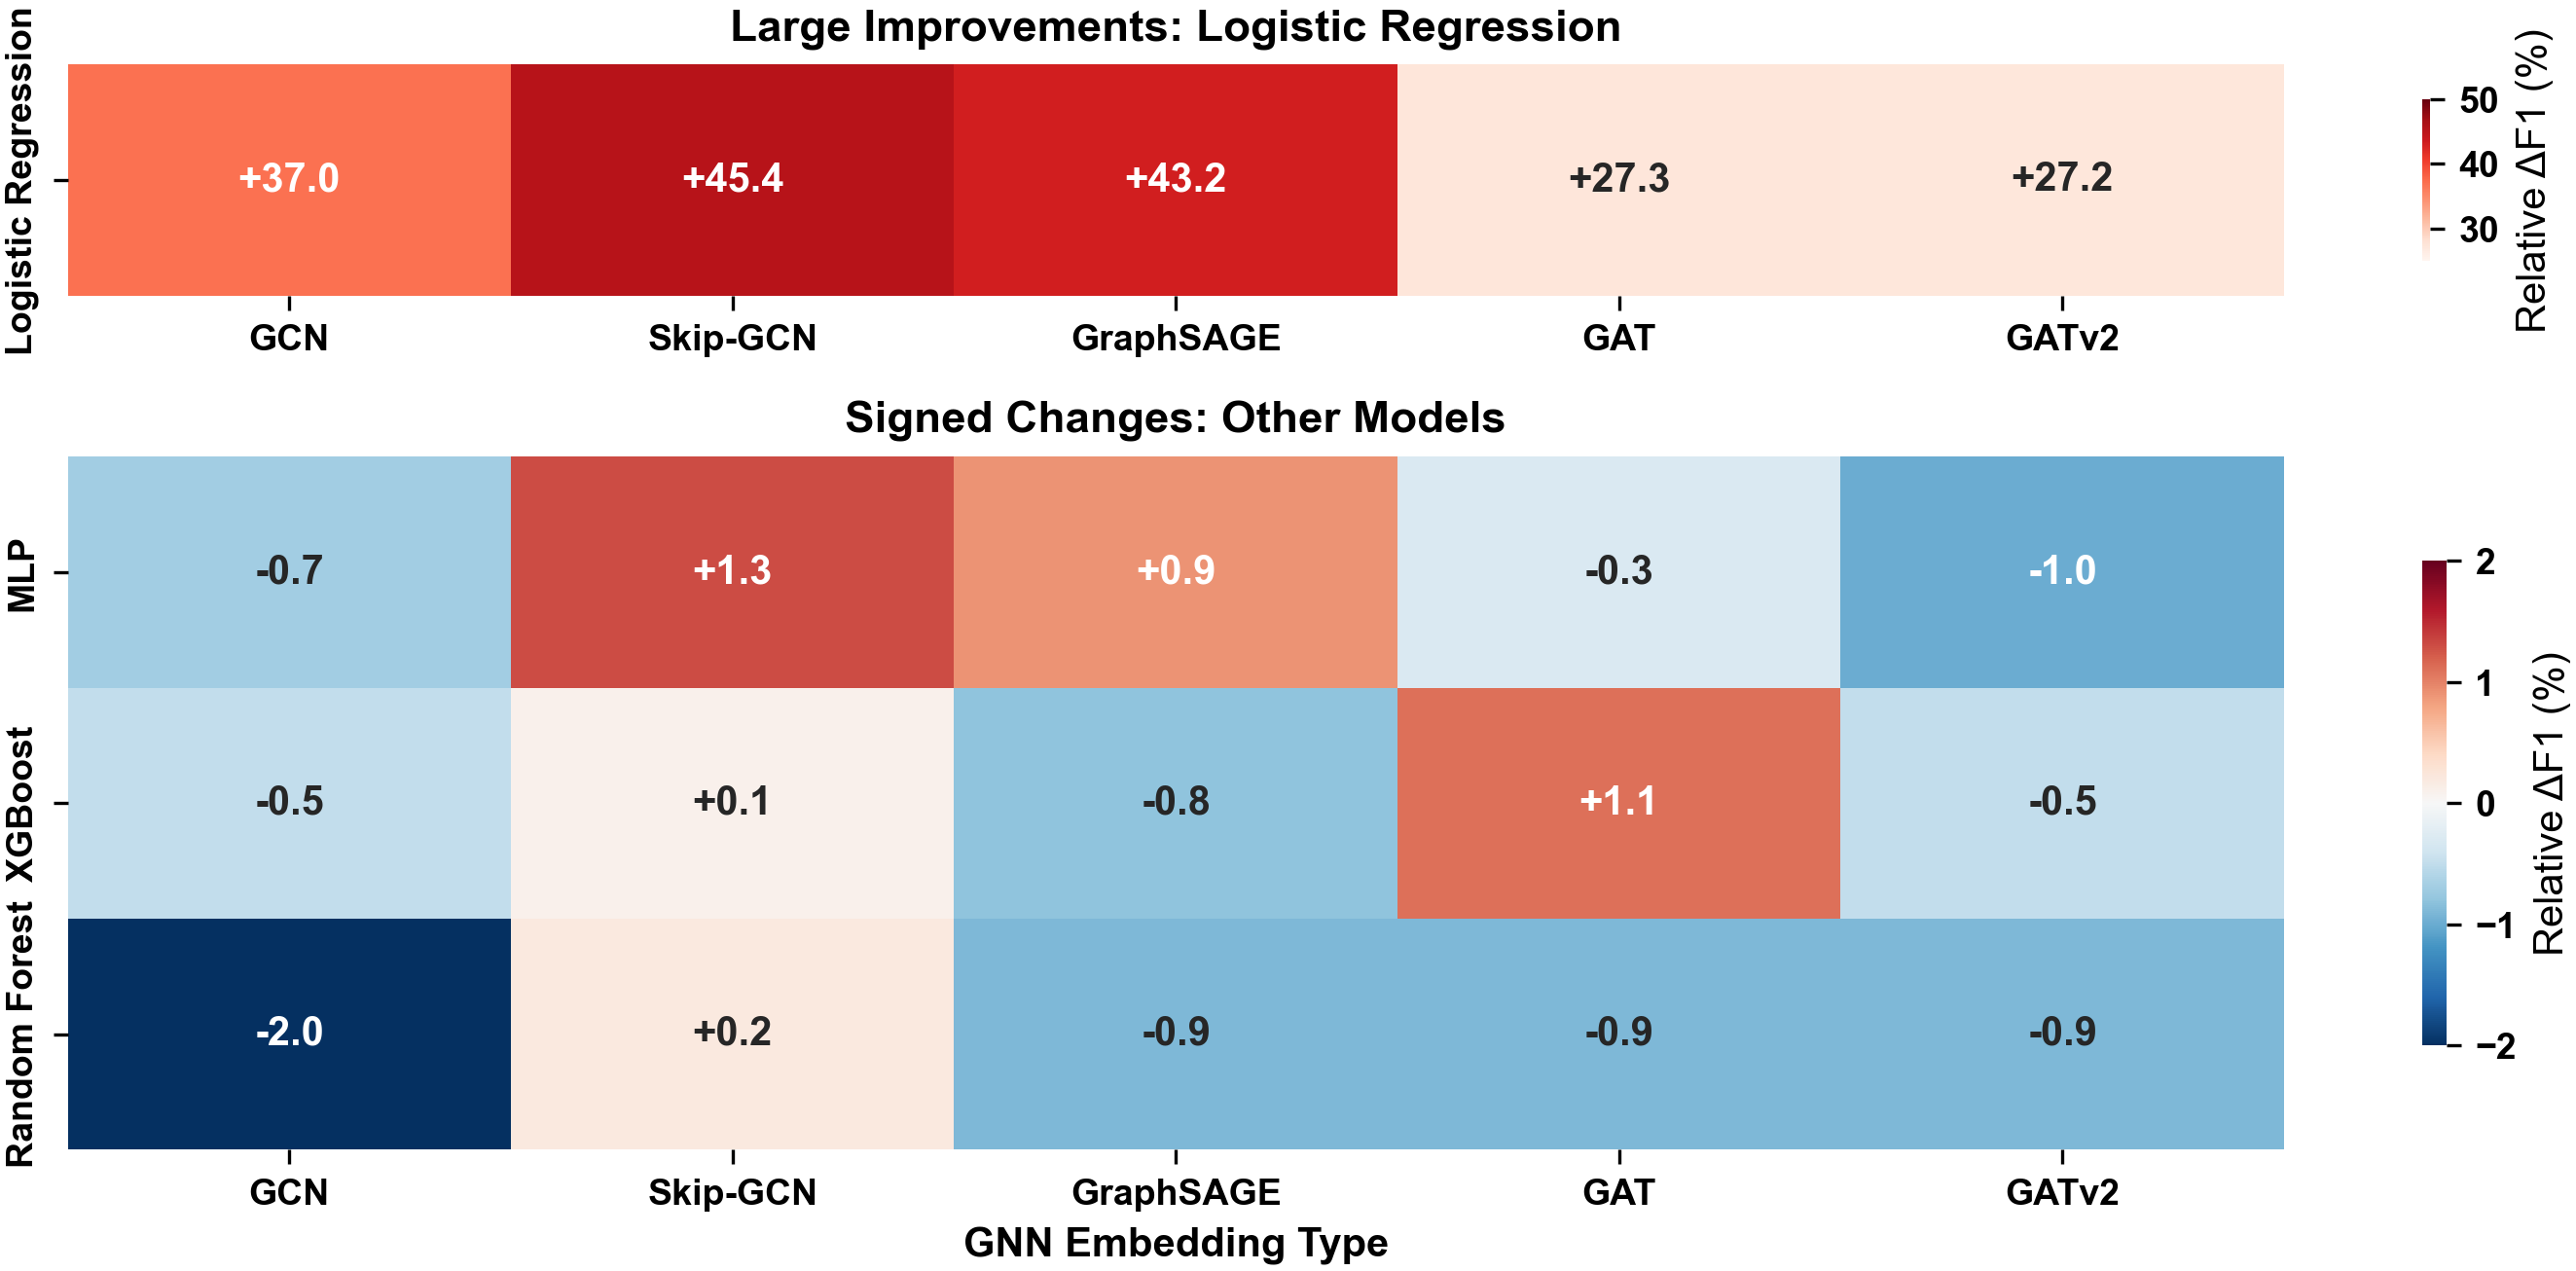

In [221]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from pathlib import Path

def plot_improved_heatmap(
    save_path="figures/improvements_heatmaps.png",
    dpi=300,
    also_svg=False,
    also_pdf=False
):
    baseline_models = ['Logistic Regression', 'MLP', 'XGBoost', 'Random Forest']
    gnn_embeddings = ['GCN', 'Skip-GCN', 'GraphSAGE', 'GAT', 'GATv2']
    
    # Correct, signed relative improvements (%)
    improvements = [
        [37.0, 45.4, 43.2, 27.3, 27.2],   # Logistic Regression
        [-0.7,  1.3,  0.9, -0.3, -1.0],   # MLP
        [-0.5,  0.1, -0.8,  1.1, -0.5],   # XGBoost
        [-2.0,  0.2, -0.9, -0.9, -0.9],   # Random Forest
    ]
    
    # Build signed string annotations (with explicit +/-)
    def signed_annot(arr):
        arr = np.asarray(arr, dtype=float)
        fmt = np.vectorize(lambda x: f"{x:+.1f}")
        return fmt(arr)
    
    fig, (ax1, ax2) = plt.subplots(
        2, 1,
        figsize=(10, 4.8),
        height_ratios=[1, 3],
        constrained_layout=False
    )
    plt.subplots_adjust(hspace=0.30)

    # -------------------------
    # Top heatmap (LR only)
    # -------------------------
    log_reg_data = np.array([improvements[0]], dtype=float)
    sns.heatmap(
        log_reg_data,
        xticklabels=gnn_embeddings,
        yticklabels=['Logistic Regression'],
        annot=signed_annot(log_reg_data), fmt='',
        cmap='Reds',           # all positive -> sequential is fine
        vmin=25, vmax=50,      # tight to your LR range for good contrast
        annot_kws={"size": 10},
        cbar_kws={'label': 'Relative ΔF1 (%)', 'shrink': 0.7},
        ax=ax1
    )
    ax1.set_title('Large Improvements: Logistic Regression', fontweight='bold', pad=6)
    ax1.set_xlabel('')

    # -------------------------
    # Bottom heatmap (others)
    # Use a diverging colormap centered at 0 with symmetric limits
    # -------------------------
    other_models_data = np.array(improvements[1:], dtype=float)
    other_model_names = baseline_models[1:]

    # symmetric limits around zero for meaningful color comparison
    max_abs = np.nanmax(np.abs(other_models_data))
    vlim = float(np.ceil(max_abs * 10) / 10.0)  # round up to nearest 0.1
    norm = TwoSlopeNorm(vmin=-vlim, vcenter=0.0, vmax=vlim)

    sns.heatmap(
        other_models_data,
        xticklabels=gnn_embeddings,
        yticklabels=other_model_names,
        annot=signed_annot(other_models_data), fmt='',
        cmap='RdBu_r',         # blue = negative, red = positive
        norm=norm,             # center at 0 with symmetric limits
        annot_kws={"size": 10},
        cbar_kws={'label': 'Relative ΔF1 (%)', 'shrink': 0.7},
        ax=ax2
    )
    ax2.set_title('Signed Changes: Other Models', fontweight='bold', pad=6)
    ax2.set_xlabel('GNN Embedding Type', fontweight='bold')

    # Layout & save
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")
    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, (ax1, ax2)

# Run
if __name__ == "__main__":
    print("Version 1: Dual-scale heatmaps with signed, diverging colors")
    plot_improved_heatmap(
        save_path="figures/improvements_heatmaps.png",
        dpi=300,
        also_svg=True
    )

Version 1: Clean operational zones


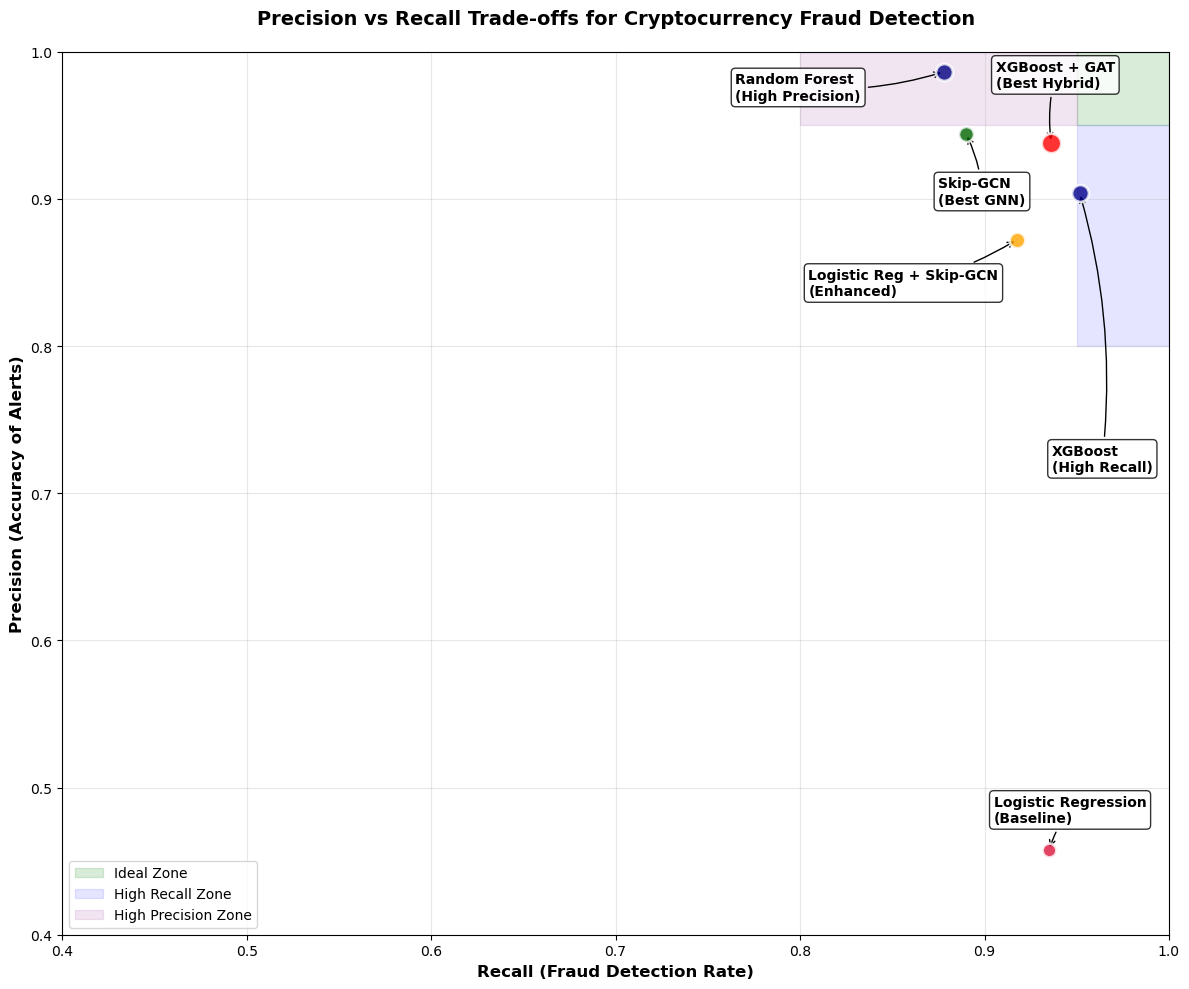

In [33]:
def plot_clean_precision_recall():
    """Cleaner version focusing on key models and operational zones"""
    
    # Select only the most important models to avoid clutter
    key_models = {
        'XGBoost + GAT\n(Best Hybrid)': (0.9362, 0.9383, 'red', 200),
        'Random Forest\n(High Precision)': (0.8779, 0.9864, 'navy', 150),
        'XGBoost\n(High Recall)': (0.9516, 0.9039, 'darkblue', 150),
        'Skip-GCN\n(Best GNN)': (0.8900, 0.9440, 'darkgreen', 120),
        'Logistic Reg + Skip-GCN\n(Enhanced)': (0.9175, 0.8724, 'orange', 130),
        'Logistic Regression\n(Baseline)': (0.9351, 0.4577, 'crimson', 100)
    }
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot each model
    for model, (recall, precision, color, size) in key_models.items():
        ax.scatter(recall, precision, c=color, s=size, alpha=0.8, 
                  edgecolors='white', linewidth=2, zorder=5)
    
    # Add operational zones with different colors
    ax.fill_between([0.95, 1.0], [0.95, 0.95], [1.0, 1.0], 
                    alpha=0.15, color='green', label='Ideal Zone')
    ax.fill_between([0.95, 1.0], [0.8, 0.8], [0.95, 0.95], 
                    alpha=0.1, color='blue', label='High Recall Zone')
    ax.fill([0.8, 0.95, 0.95, 0.8], [0.95, 0.95, 1.0, 1.0], 
            alpha=0.1, color='purple', label='High Precision Zone')
    
    # Add clean labels using annotate with arrows
    annotations = {
        'XGBoost + GAT\n(Best Hybrid)': (0.9362, 0.9383, (-40, 40)),
        'Random Forest\n(High Precision)': (0.8779, 0.9864, (-150, -20)),
        'XGBoost\n(High Recall)': (0.9516, 0.9039, (-20, -200)),
        'Skip-GCN\n(Best GNN)': (0.8900, 0.9440, (-20, -50)),
        'Logistic Reg + Skip-GCN\n(Enhanced)': (0.9175, 0.8724, (-150, -40)),
        'Logistic Regression\n(Baseline)': (0.9351, 0.4577, (-40, 20))
    }
    
    for model, (recall, precision, offset) in annotations.items():
        ax.annotate(model, (recall, precision), 
                   xytext=offset, textcoords='offset points',
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1'))
    
    ax.set_xlabel('Recall (Fraud Detection Rate)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Precision (Accuracy of Alerts)', fontsize=12, fontweight='bold')
    ax.set_title('Precision vs Recall Trade-offs for Cryptocurrency Fraud Detection', 
                fontsize=14, fontweight='bold', pad=20)
    
    ax.set_xlim(0.4, 1.0)
    ax.set_ylim(0.4, 1.0)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower left', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    print("Version 1: Clean operational zones")
    plot_clean_precision_recall()
    

Version 1: Clean operational zones


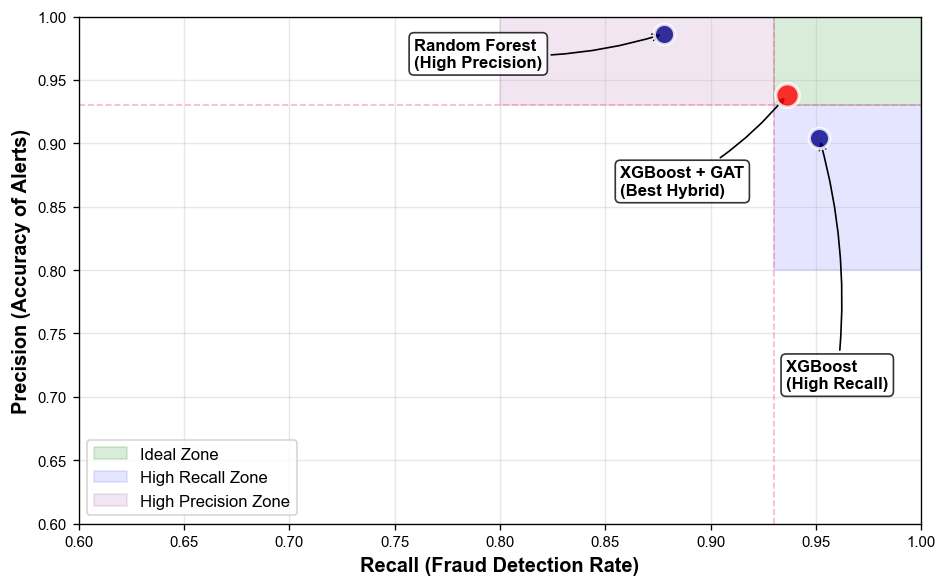

In [181]:
import matplotlib.pyplot as plt
from pathlib import Path

def plot_clean_precision_recall(save_path="precision_recall.png", dpi=300, also_svg=False, also_pdf=False):
    """Cleaner version focusing on key models and operational zones + high-res save"""

    # --- thresholds (tune here) ---
    RECALL_IDEAL = 0.93
    PREC_IDEAL   = 0.93
    RECALL_MIN   = 0.80
    PREC_MIN     = 0.80

    key_models = {
        'XGBoost + GAT\n(Best Hybrid)': (0.9362, 0.9383, 'red', 200),
        'Random Forest\n(High Precision)': (0.8779, 0.9864, 'navy', 150),
        'XGBoost\n(High Recall)': (0.9516, 0.9039, 'darkblue', 150),
    }

    fig, ax = plt.subplots(figsize=(8, 5))

    for model, (recall, precision, color, size) in key_models.items():
        ax.scatter(recall, precision, c=color, s=size, alpha=0.8,
                   edgecolors='white', linewidth=2, zorder=5)

    # --- operational zones ---
    ax.fill_between([RECALL_IDEAL, 1.0], [PREC_IDEAL, PREC_IDEAL], [1.0, 1.0],
                    alpha=0.15, color='green', label='Ideal Zone')
    ax.fill_between([RECALL_IDEAL, 1.0], [PREC_MIN, PREC_MIN], [PREC_IDEAL, PREC_IDEAL],
                    alpha=0.1, color='blue', label='High Recall Zone')
    ax.fill([RECALL_MIN, RECALL_IDEAL, RECALL_IDEAL, RECALL_MIN],
            [PREC_IDEAL, PREC_IDEAL, 1.0, 1.0],
            alpha=0.1, color='purple', label='High Precision Zone')

    ax.axvline(RECALL_IDEAL, linestyle='--', linewidth=1, alpha=0.5)
    ax.axhline(PREC_IDEAL, linestyle='--', linewidth=1, alpha=0.5)

    annotations = {
        'XGBoost + GAT\n(Best Hybrid)': (0.9362, 0.9383, (-100, -60)),
        'Random Forest\n(High Precision)': (0.8779, 0.9864, (-150, -20)),
        'XGBoost\n(High Recall)': (0.9516, 0.9039, (-20, -150)),
    }
    for model, (recall, precision, offset) in annotations.items():
        ax.annotate(model, (recall, precision),
                    xytext=offset, textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1'))

    ax.set_xlabel('Recall (Fraud Detection Rate)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Precision (Accuracy of Alerts)', fontsize=12, fontweight='bold')
    ax.set_xlim(0.6, 1.0)
    ax.set_ylim(0.6, 1.0)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower left', fontsize=10)

    plt.tight_layout()

    # --- high-res saves ---
    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    # PNG (raster) for slides/docs
    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")

    # Optional: vector formats for print/publication
    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, ax

if __name__ == "__main__":
    print("Version 1: Clean operational zones")
    plot_clean_precision_recall(save_path="figures/precision_recall.png", dpi=300, also_svg=True)

F1 lollipop with high-res saving


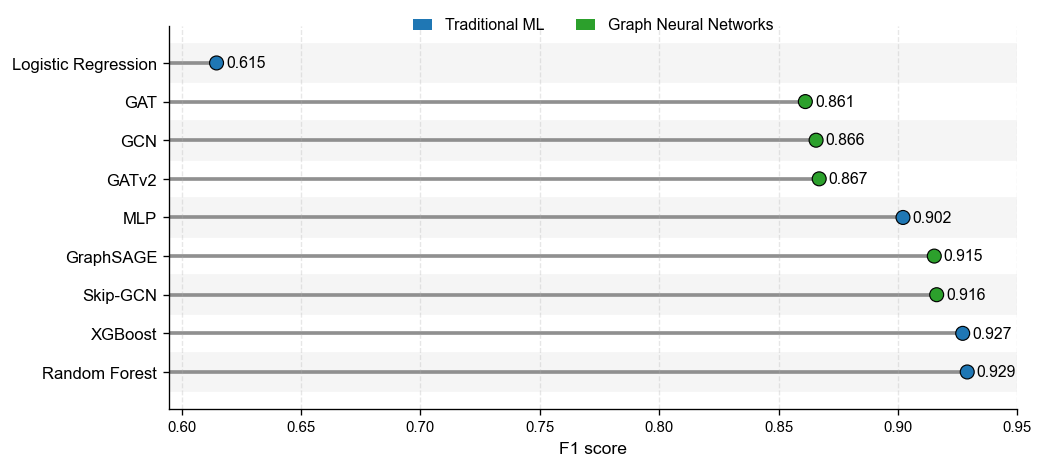

In [184]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def plot_f1_lollipop(
    save_path="figures/f1_lollipop.png",
    dpi=300,
    also_svg=False,
    also_pdf=False
):
    models = [
        ("Random Forest","Traditional",0.9290),
        ("XGBoost","Traditional",0.9271),
        ("MLP","Traditional",0.9021),
        ("Logistic Regression","Traditional",0.6146),
        ("Skip-GCN","GNN",0.9162),
        ("GraphSAGE","GNN",0.9152),
        ("GATv2","GNN",0.8670),
        ("GCN","GNN",0.8657),
        ("GAT","GNN",0.8612),
    ]

    # sort by F1 (high → low)
    models_sorted = sorted(models, key=lambda x: x[2], reverse=True)
    names   = [m[0] for m in models_sorted]
    groups  = [m[1] for m in models_sorted]
    scores  = np.array([m[2] for m in models_sorted])

    # colors
    color_map = {"Traditional":"#1f77b4", "GNN":"#2ca02c"}
    colors = [color_map[g] for g in groups]

    fig, ax = plt.subplots(figsize=(8.8, 4.0))
    y = np.arange(len(names))

    # alternating row bands
    for i in range(len(names)):
        if i % 2 == 0:
            ax.axhspan(i-0.5, i+0.5, color="#f5f5f5", zorder=0)

    # stems + markers
    left = max(0.55, scores.min() - 0.02)
    right = min(0.96, scores.max() + 0.02)
    ax.hlines(y, xmin=left, xmax=scores, lw=2.2, color="#8a8a8a", alpha=0.95, zorder=1)
    ax.scatter(scores, y, s=70, c=colors, edgecolor="black", linewidth=0.7, zorder=3)

    # value labels
    for yi, s in zip(y, scores):
        ax.text(s + 0.004, yi, f"{s:.3f}", va="center", fontsize=9.5)

    # axes, ticks, labels
    ax.set_yticks(y)
    ax.set_yticklabels(names, fontsize=10)
    ax.set_xlabel("F1 score", fontsize=10.5)
    ax.set_xlim(left, right)
    ax.set_xticks(np.round(np.linspace(0.60, 0.95, 8), 2))
    ax.grid(axis="x", alpha=0.3, linestyle="--", linewidth=0.8)

    # tidy spines
    for spine in ("top","right"):
        ax.spines[spine].set_visible(False)

    # legend
    from matplotlib.patches import Patch
    ax.legend(
        handles=[
            Patch(facecolor=color_map["Traditional"], label="Traditional ML"),
            Patch(facecolor=color_map["GNN"], label="Graph Neural Networks")
        ],
        frameon=False, loc="upper center", bbox_to_anchor=(0.5, 1.06),
        ncol=2, fontsize=9.5, handlelength=1.2
    )

    plt.tight_layout()

    # --- high-res saves (same place as others) ---
    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")

    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, ax

# Run
if __name__ == "__main__":
    print("F1 lollipop with high-res saving")
    plot_f1_lollipop(
        save_path="figures/f1_lollipop.png",
        dpi=300,
        also_svg=True
    )

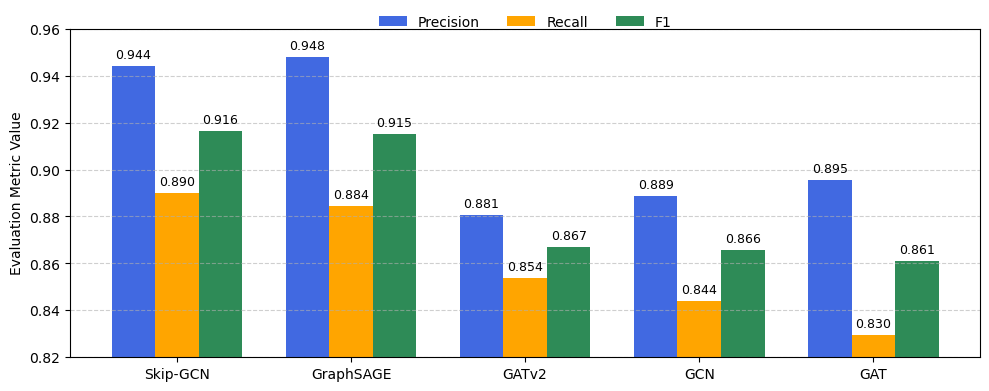

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Data
gnn_models = ['Skip-GCN', 'GraphSAGE', 'GATv2', 'GCN', 'GAT']
precision_scores = [0.9440, 0.9481, 0.8808, 0.8888, 0.8955]
recall_scores = [0.8900, 0.8845, 0.8537, 0.8438, 0.8295]
f1_scores = [0.9162, 0.9152, 0.8670, 0.8657, 0.8612]

# X positions and bar width
x = np.arange(len(gnn_models))
width = 0.25

# Create figure (shorter height for compactness)
plt.figure(figsize=(10, 4))

# Bars
bars1 = plt.bar(x - width, precision_scores, width, label='Precision', color='royalblue')
bars2 = plt.bar(x, recall_scores, width, label='Recall', color='orange')
bars3 = plt.bar(x + width, f1_scores, width, label='F1', color='seagreen')

# Axes labels and limits
plt.xticks(x, gnn_models)
plt.ylabel("Evaluation Metric Value")
plt.ylim(0.82, 0.96)  # zoomed-in range to reduce empty space
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add exact values above bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.002,
                 f"{height:.3f}", ha='center', va='bottom', fontsize=9)

# Legend above plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=3, frameon=False)

plt.tight_layout()
plt.show()


Precision vs Recall of GNN Models (saved high-res)


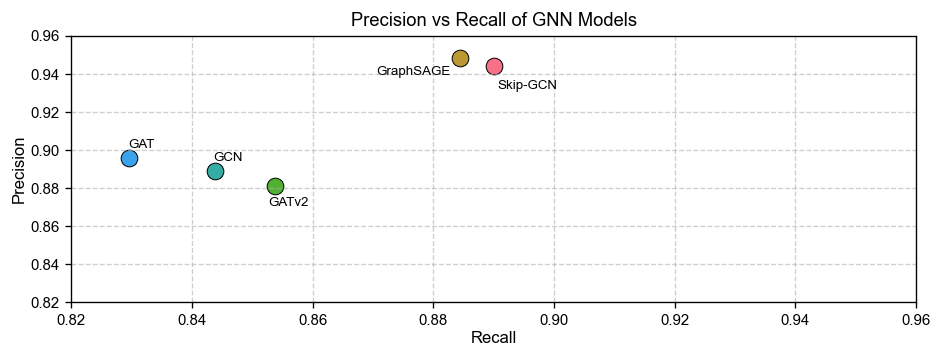

In [185]:
import matplotlib.pyplot as plt
from pathlib import Path

def plot_gnn_precision_recall(
    save_path="figures/gnn_precision_recall.png",
    dpi=300,
    also_svg=False,
    also_pdf=False
):
    # Data
    gnn_models = ['Skip-GCN', 'GraphSAGE', 'GATv2', 'GCN', 'GAT']
    precision_scores = [0.9440, 0.9481, 0.8808, 0.8888, 0.8955]
    recall_scores    = [0.8900, 0.8845, 0.8537, 0.8438, 0.8295]

    # Compact figure
    fig, ax = plt.subplots(figsize=(8, 3.0))  # shorter height

    # Points
    for model, p, r in zip(gnn_models, precision_scores, recall_scores):
        ax.scatter(r, p, s=100, edgecolor="black", linewidth=0.6)

    # Model-specific label offsets to avoid overlap
    offsets = {
        'Skip-GCN':  (20, -12),
        'GraphSAGE': (-28, -8),
        'GATv2':     (8, -10),
        'GCN':       (8,  8),
        'GAT':       (8,  8),
    }

    for model, p, r in zip(gnn_models, precision_scores, recall_scores):
        dx, dy = offsets.get(model, (6, 6))
        ax.annotate(model, (r, p),
                    textcoords="offset points", xytext=(dx, dy),
                    ha='center', va='center', fontsize=8)

    # Axes, limits, grid
    ax.set_title("Precision vs Recall of GNN Models", pad=6)
    ax.set_xlabel("Recall", labelpad=2)
    ax.set_ylabel("Precision", labelpad=2)
    ax.set_xlim(0.82, 0.96)
    ax.set_ylim(0.82, 0.96)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Tight padding (less vertical space)
    plt.subplots_adjust(top=0.92, bottom=0.18, left=0.10, right=0.98)

    # ---- high-res saves (same place) ----
    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")
    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, ax

# Run
if __name__ == "__main__":
    print("Precision vs Recall of GNN Models (saved high-res)")
    plot_gnn_precision_recall(
        save_path="figures/gnn_precision_recall.png",
        dpi=300,
        also_svg=True
    )

Baseline precision–recall (saved high-res)


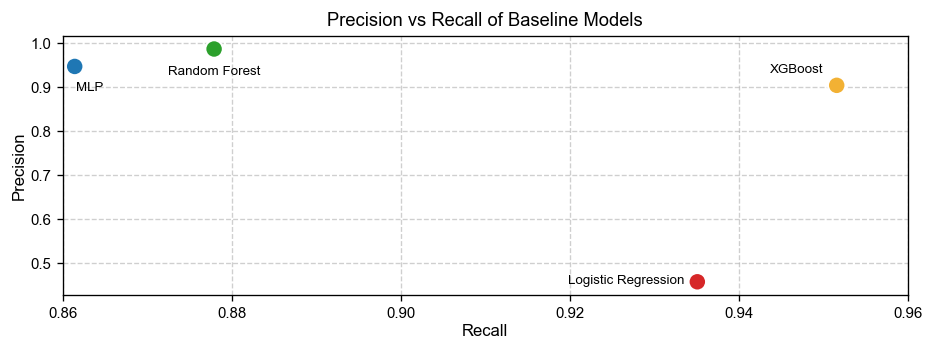

In [186]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def plot_baseline_precision_recall(
    save_path="figures/baseline_precision_recall.png",
    dpi=300,
    also_svg=False,
    also_pdf=False
):
    # Baseline models + metrics
    models = ['Random Forest', 'XGBoost', 'MLP', 'Logistic Regression']
    P = np.array([0.9864, 0.9039, 0.9468, 0.4577])  # precision
    R = np.array([0.8779, 0.9516, 0.8614, 0.9351])  # recall

    fig, ax = plt.subplots(figsize=(8, 3.0))

    # Colors per model (same as before)
    palette = {
        'Random Forest':       '#2ca02c',
        'XGBoost':             '#f2b134',
        'MLP':                 '#1f77b4',
        'Logistic Regression': '#d62728',
    }
    colors = [palette[m] for m in models]

    # Points
    ax.scatter(R, P, s=110, color=colors, edgecolors='white', linewidths=1.2, zorder=3)

    # Label offsets (closer to markers)
    label_cfg = {
        'Random Forest':        dict(offset=(0,  -10), ha='center', va='top'),
        'MLP':                  dict(offset=(9,  -9), ha='center', va='top'),
        'XGBoost':              dict(offset=(-8,   6), ha='right',  va='bottom'),
        'Logistic Regression':  dict(offset=(-8,  -3), ha='right',  va='bottom'),
    }
    for m, p, r in zip(models, P, R):
        cfg = label_cfg[m]
        ax.annotate(m, (r, p),
                    textcoords="offset points", xytext=cfg['offset'],
                    ha=cfg['ha'], va=cfg['va'], fontsize=8)

    # Axes, grid
    ax.set_title("Precision vs Recall of Baseline Models", pad=6)
    ax.set_xlabel("Recall", labelpad=2)
    ax.set_ylabel("Precision", labelpad=2)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Round, compact x-range and nice ticks
    ax.set_xlim(0.86, 0.96)
    ax.xaxis.set_major_locator(MultipleLocator(0.02))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # Keep original y-margins so markers don’t clip
    ypad = 0.03
    ax.set_ylim(P.min() - ypad, P.max() + ypad)

    # Tight layout
    plt.subplots_adjust(top=0.92, bottom=0.20, left=0.10, right=0.98)

    # --- high-res saves (same place) ---
    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")
    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, ax

# Run
if __name__ == "__main__":
    print("Baseline precision–recall (saved high-res)")
    plot_baseline_precision_recall(
        save_path="figures/baseline_precision_recall.png",
        dpi=300,
        also_svg=True
    )

Baselines × GNN embeddings (saved high-res)


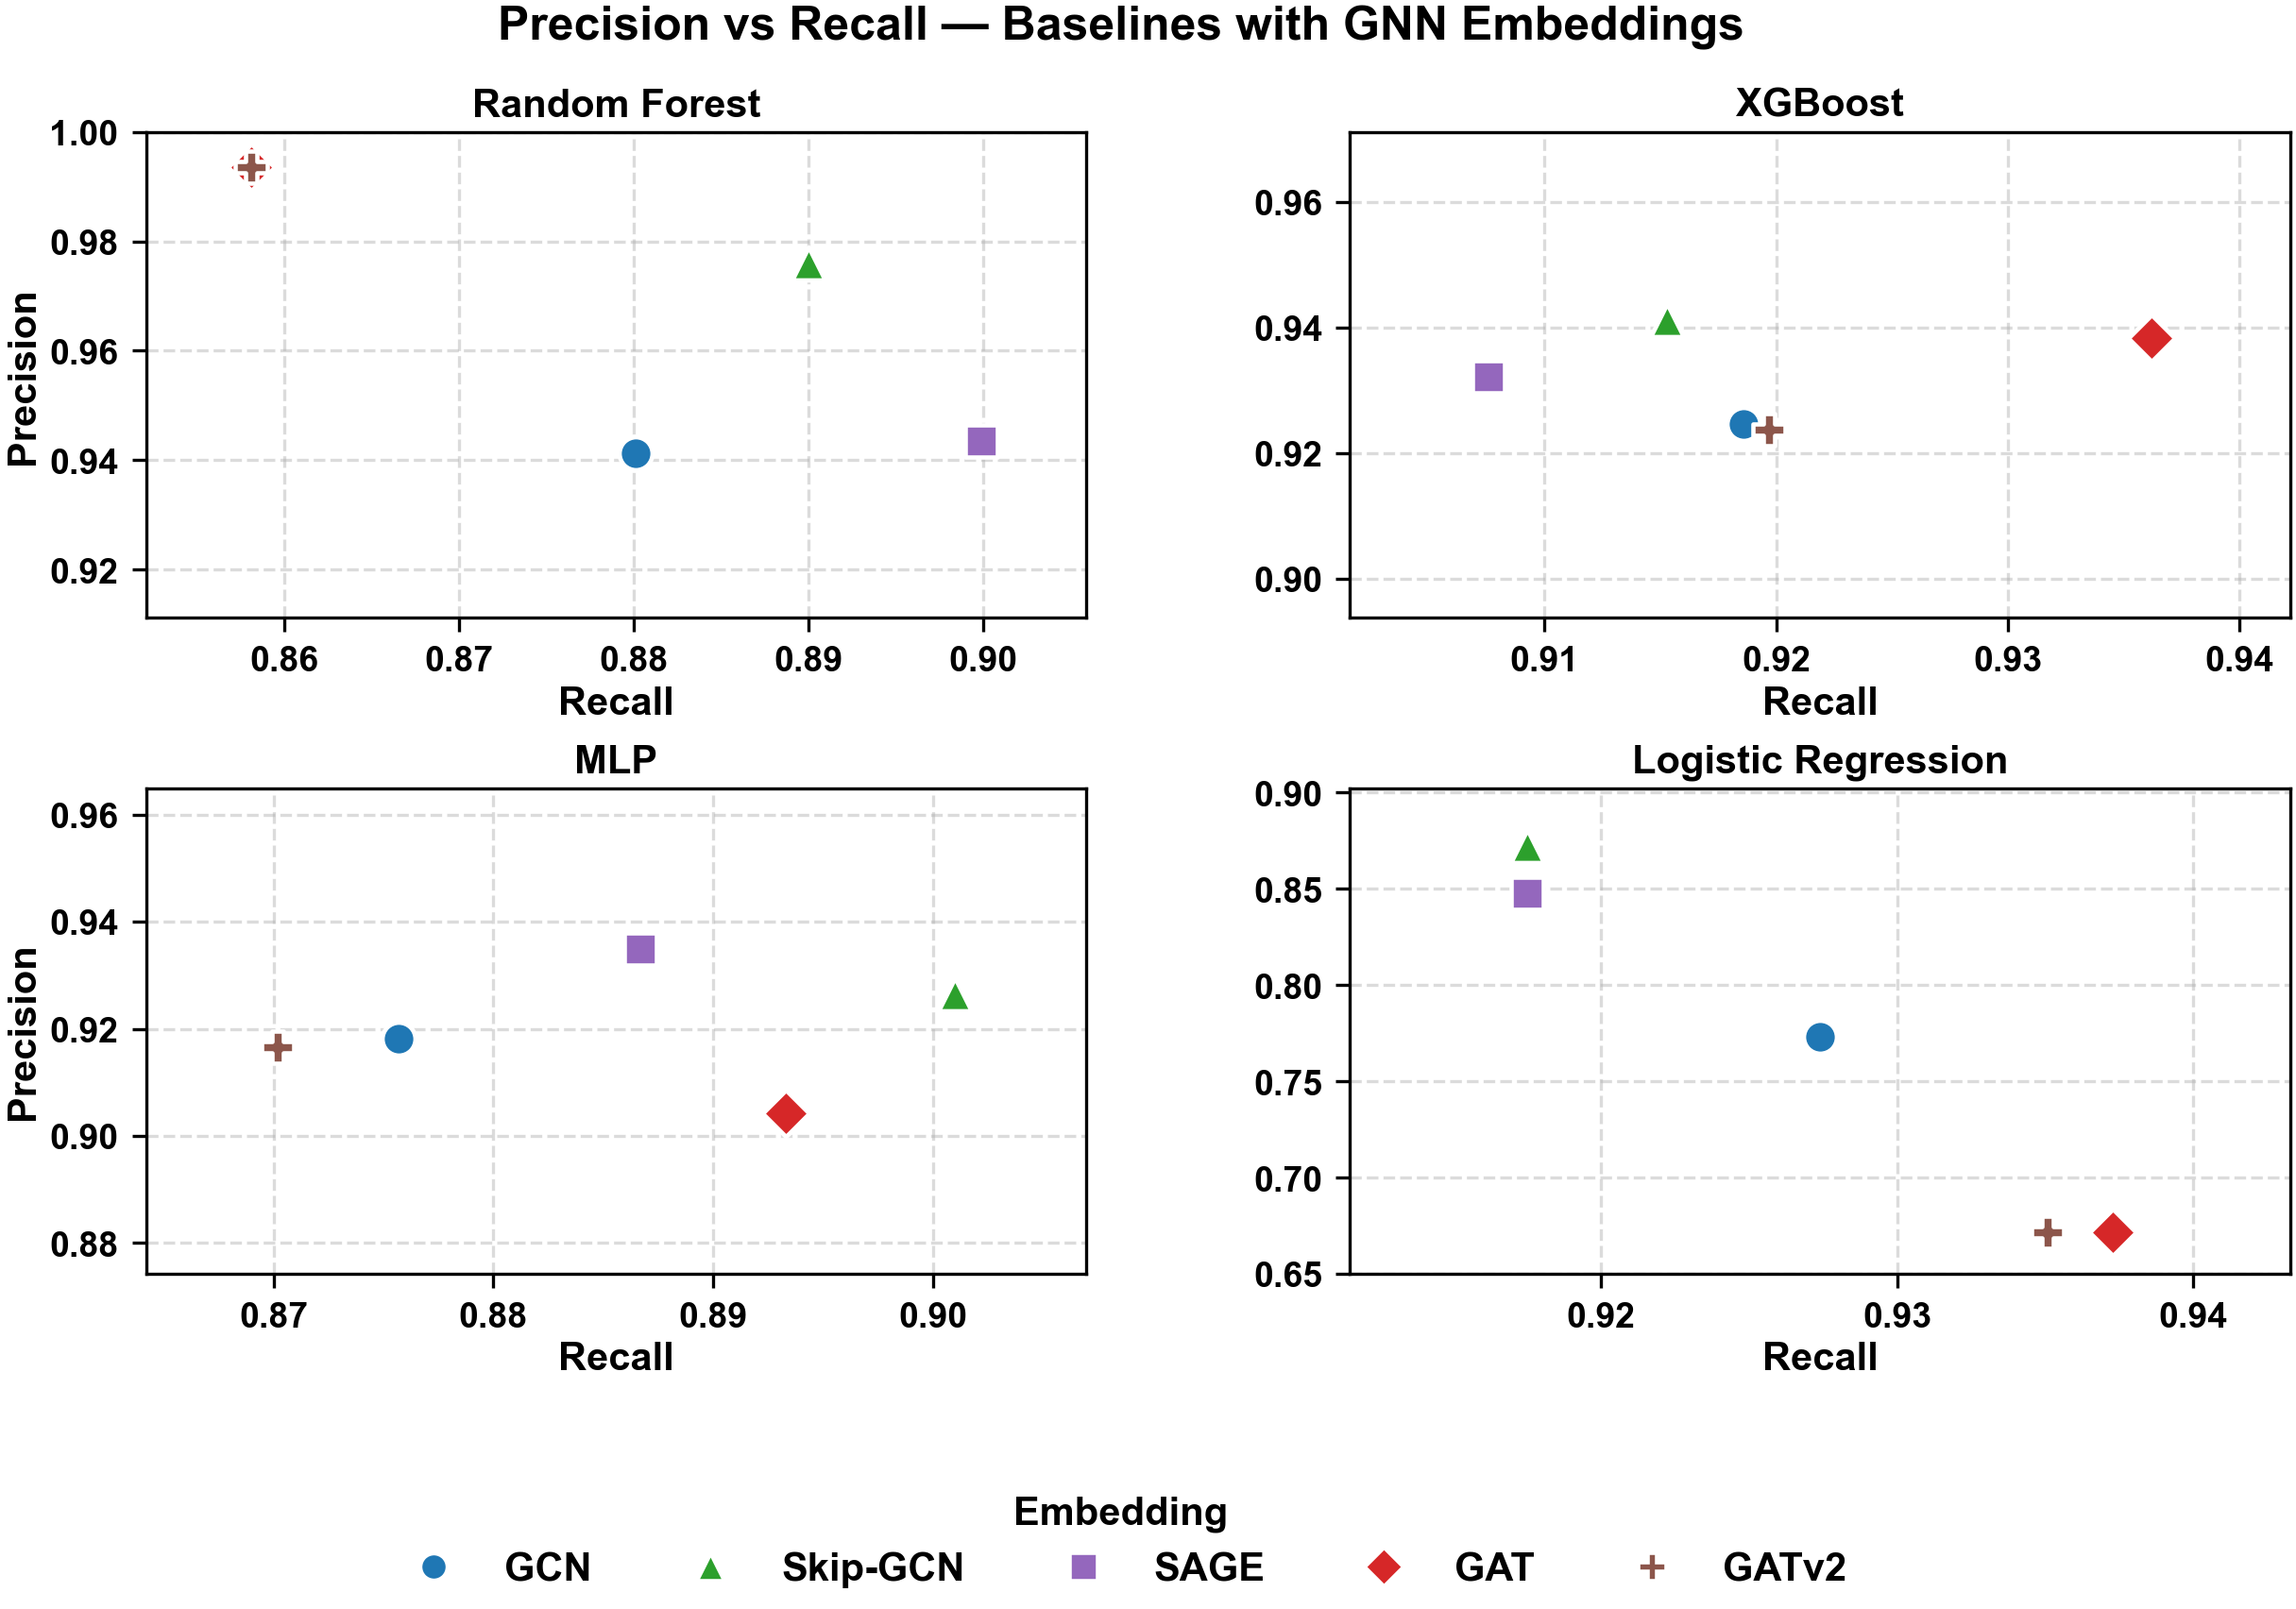

In [212]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from pathlib import Path

def plot_baselines_with_gnn_embeddings(
    save_path="figures/baselines_gnn_embeddings.png",
    dpi=300,
    also_svg=False,
    also_pdf=False
):
    # --- precision (P), recall (R) ---
    data = {
        "Random Forest": {
            "GCN":   (0.9412, 0.8801),
            "Skip-GCN": (0.9759, 0.8900),
            "GAT":   (0.9936, 0.8581),
            "GATv2": (0.9936, 0.8581),
            "SAGE":  (0.9435, 0.8999),
        },
        "XGBoost": {
            "GCN":   (0.9247, 0.9186),
            "Skip-GCN": (0.9412, 0.9153),
            "GAT":   (0.9383, 0.9362),
            "GATv2": (0.9238, 0.9197),
            "SAGE":  (0.9322, 0.9076),
        },
        "MLP": {
            "GCN":   (0.9181, 0.8757),
            "Skip-GCN": (0.9265, 0.9010),
            "GAT":   (0.9042, 0.8933),
            "GATv2": (0.9166, 0.8702),
            "SAGE":  (0.9350, 0.8867),
        },
        "Logistic Regression": {
            "GCN":   (0.7734, 0.9274),
            "Skip-GCN": (0.8724, 0.9175),
            "GAT":   (0.6719, 0.9373),
            "GATv2": (0.6719, 0.9351),
            "SAGE":  (0.8476, 0.9175),
        }
    }

    embed_order   = ["GCN", "Skip-GCN", "SAGE", "GAT", "GATv2"]
    embed_markers = {"GCN":"o", "Skip-GCN":"^", "SAGE":"s", "GAT":"D", "GATv2":"P"}
    embed_colors  = {"GCN":"#1f77b4", "Skip-GCN":"#2ca02c", "SAGE":"#9467bd", "GAT":"#d62728", "GATv2":"#8c564b"}

    # 2×2 grid: top row RF & XGB, bottom row MLP & LR
    fig, axes = plt.subplots(2, 2, figsize=(8.6, 5.6), sharey=False)
    panel_order = ["Random Forest", "XGBoost", "MLP", "Logistic Regression"]

    for ax, base in zip(axes.ravel(), panel_order):
        combos = data[base]
        Rs, Ps = [], []
        for emb in embed_order:
            P, R = combos[emb]
            Rs.append(R); Ps.append(P)
            ax.scatter(R, P, s=70, marker=embed_markers[emb],
                       color=embed_colors[emb], edgecolors="white", linewidths=1.1, zorder=3)

        # Auto-zoom each panel tightly around its five points (adds small margins)
        xmin, xmax = min(Rs), max(Rs)
        ymin, ymax = min(Ps), max(Ps)
        ax.set_xlim(max(0.82, xmin - 0.006), min(0.98, xmax + 0.006))
        ax.set_ylim(max(0.65, ymin - 0.03),  min(1.00, ymax + 0.03))

        # Clean ticks/grid
        ax.xaxis.set_major_locator(MultipleLocator(0.01))
        ax.xaxis.set_major_formatter(FormatStrFormatter("%.2f"))
        ax.grid(True, linestyle="--", alpha=0.45)

        # Bold titles/labels
        ax.set_title(base, pad=4, fontsize=10, fontweight="bold")
        ax.set_xlabel("Recall", labelpad=2, fontweight="bold")

        # Bold tick labels
        for t in ax.get_xticklabels() + ax.get_yticklabels():
            t.set_fontweight("bold")

    # Y-label on the left column
    axes[0,0].set_ylabel("Precision", labelpad=2, fontweight="bold")
    axes[1,0].set_ylabel("Precision", labelpad=2, fontweight="bold")

    # Shared legend (embedding marker/color) below the panels
    from matplotlib.lines import Line2D
    legend_handles = [
        Line2D([0],[0], marker=embed_markers[e], linestyle="",
               markerfacecolor=embed_colors[e], markeredgecolor="white",
               markeredgewidth=1.1, markersize=7, label=e)
        for e in embed_order
    ]
    fig_legend = fig.legend(handles=legend_handles, loc="lower center", ncol=5, frameon=False,
               bbox_to_anchor=(0.5, -0.04), title="Embedding", prop={"weight": "bold"})
    fig_legend.get_title().set_fontweight("bold")

    fig.suptitle("Precision vs Recall — Baselines with GNN Embeddings", y=0.98, fontsize=12, fontweight="bold")
    plt.subplots_adjust(top=0.90, bottom=0.18, left=0.10, right=0.98, wspace=0.28, hspace=0.35)

    # ---- high-res saves (same place) ----
    save_path = Path(save_path)
    save_path.parent.mkdir(parents=True, exist_ok=True)

    fig.savefig(save_path, dpi=dpi, bbox_inches="tight", pad_inches=0.02, facecolor="white")
    if also_svg:
        fig.savefig(save_path.with_suffix(".svg"), bbox_inches="tight", pad_inches=0.02)
    if also_pdf:
        fig.savefig(save_path.with_suffix(".pdf"), bbox_inches="tight", pad_inches=0.02)

    plt.show()
    return fig, axes

# Run
if __name__ == "__main__":
    print("Baselines × GNN embeddings (saved high-res)")
    plot_baselines_with_gnn_embeddings(
        save_path="figures/baselines_gnn_embeddings.png",
        dpi=300,
        also_svg=True
    )

Creating visualizations...

1. Creating heatmap (primary option)...


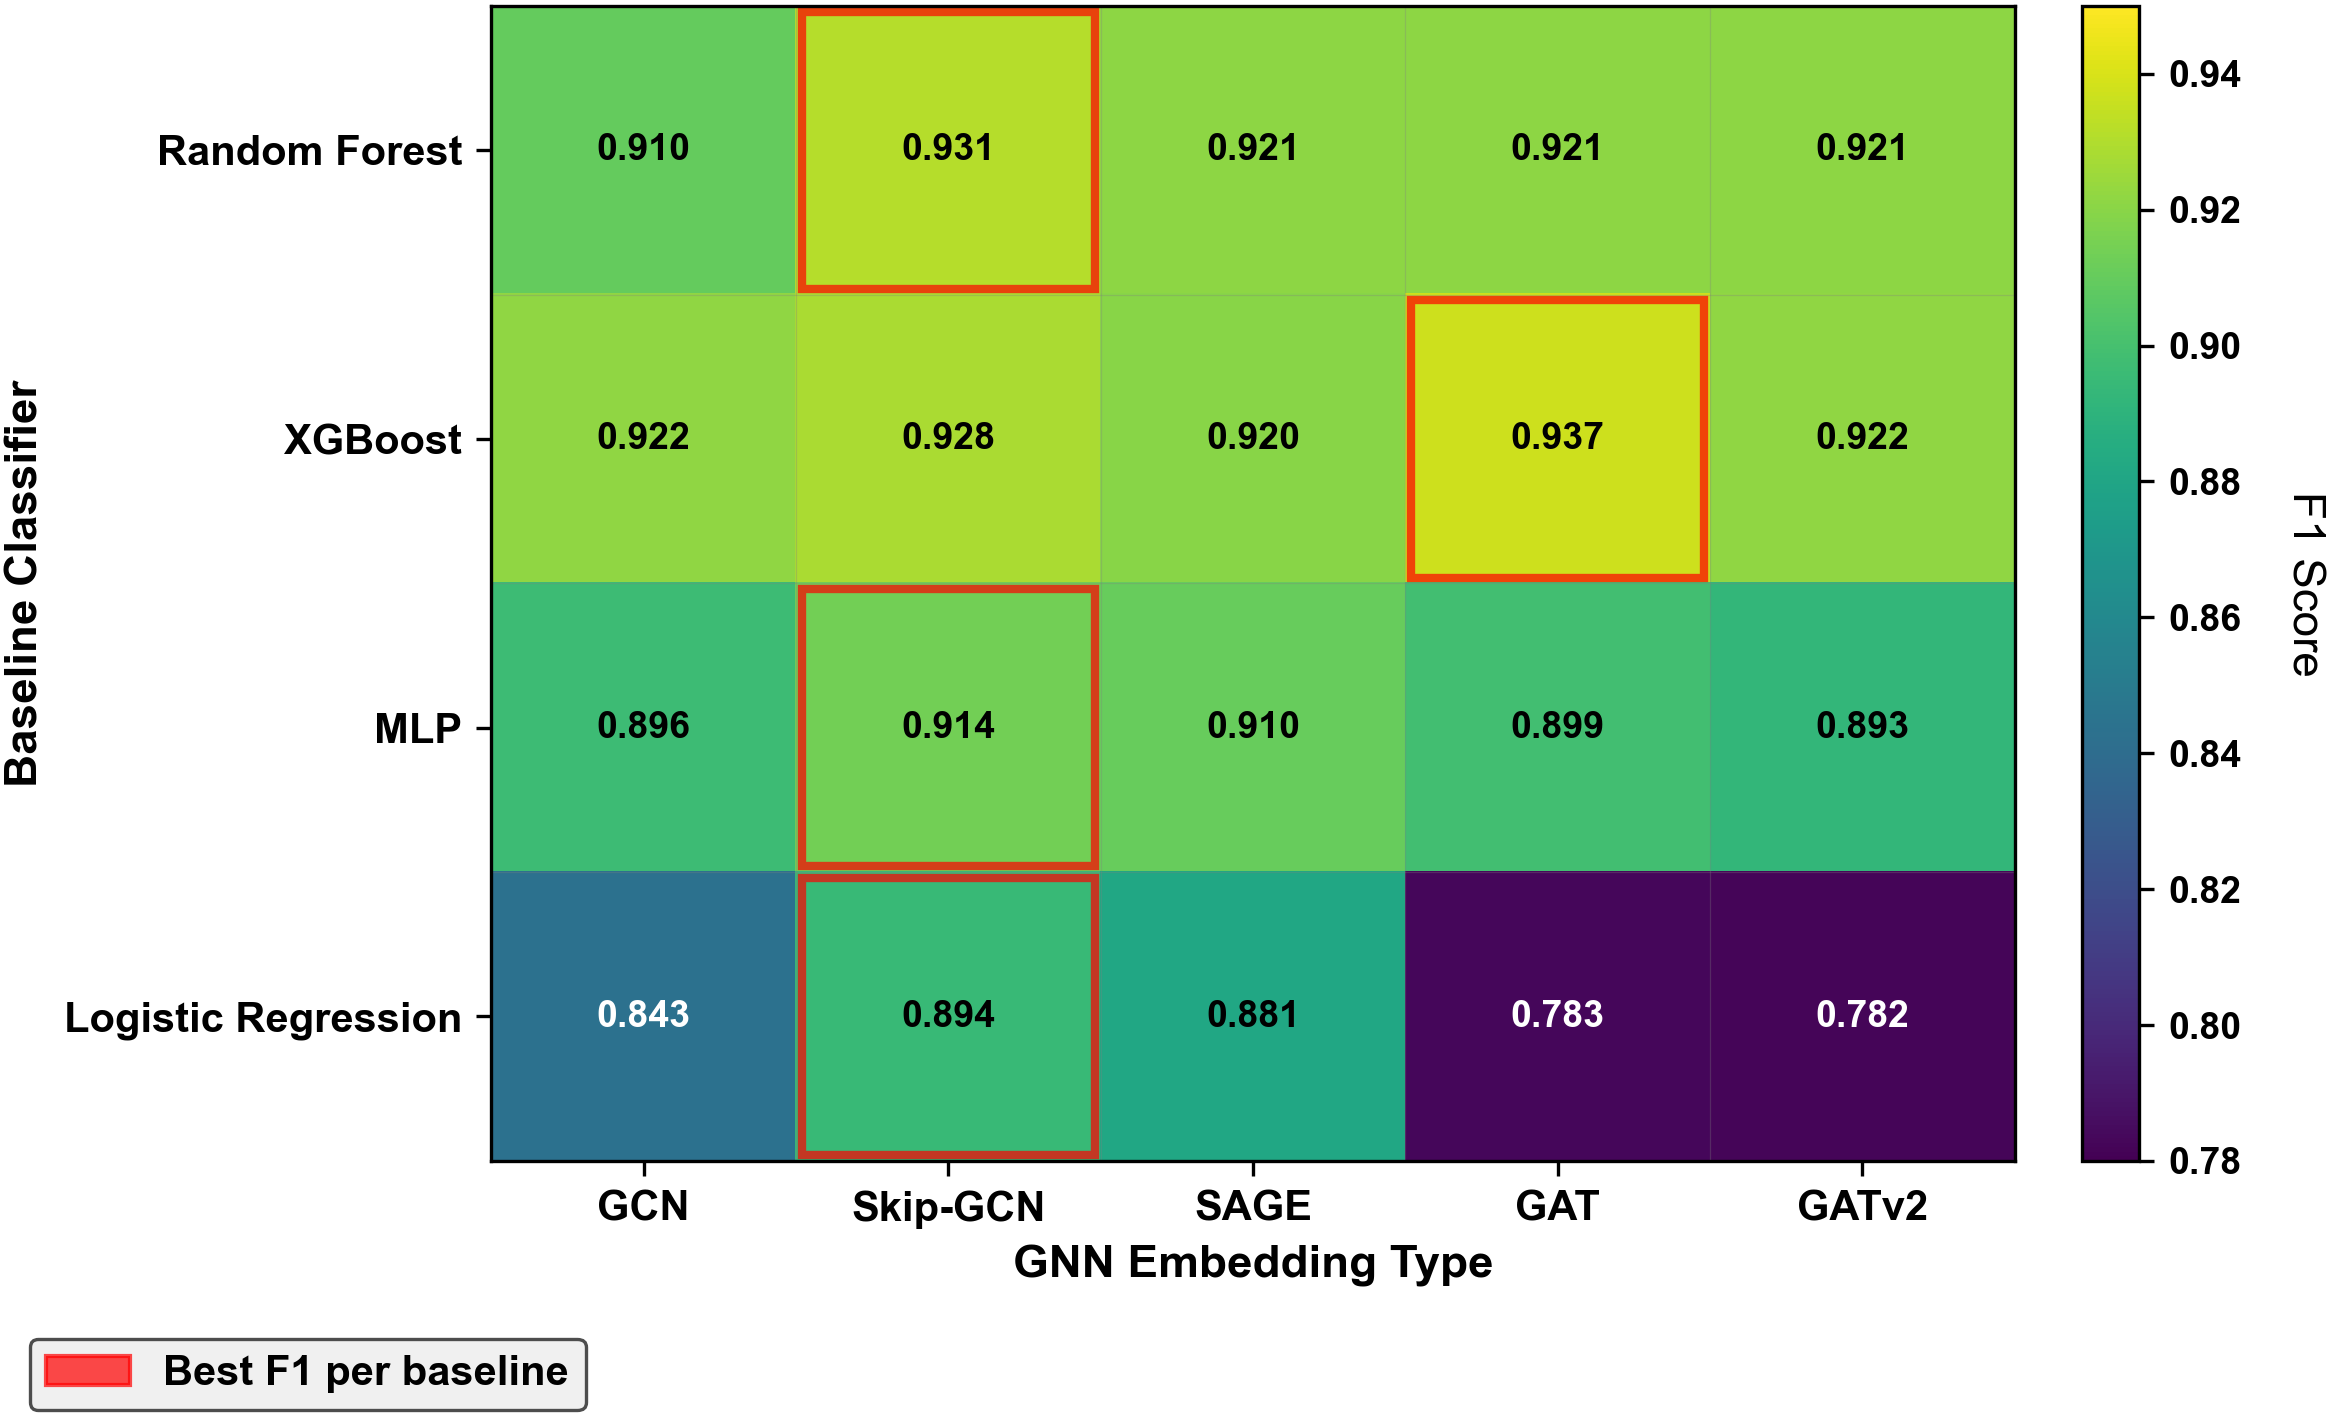


2. Creating grouped bar charts (alternative option)...


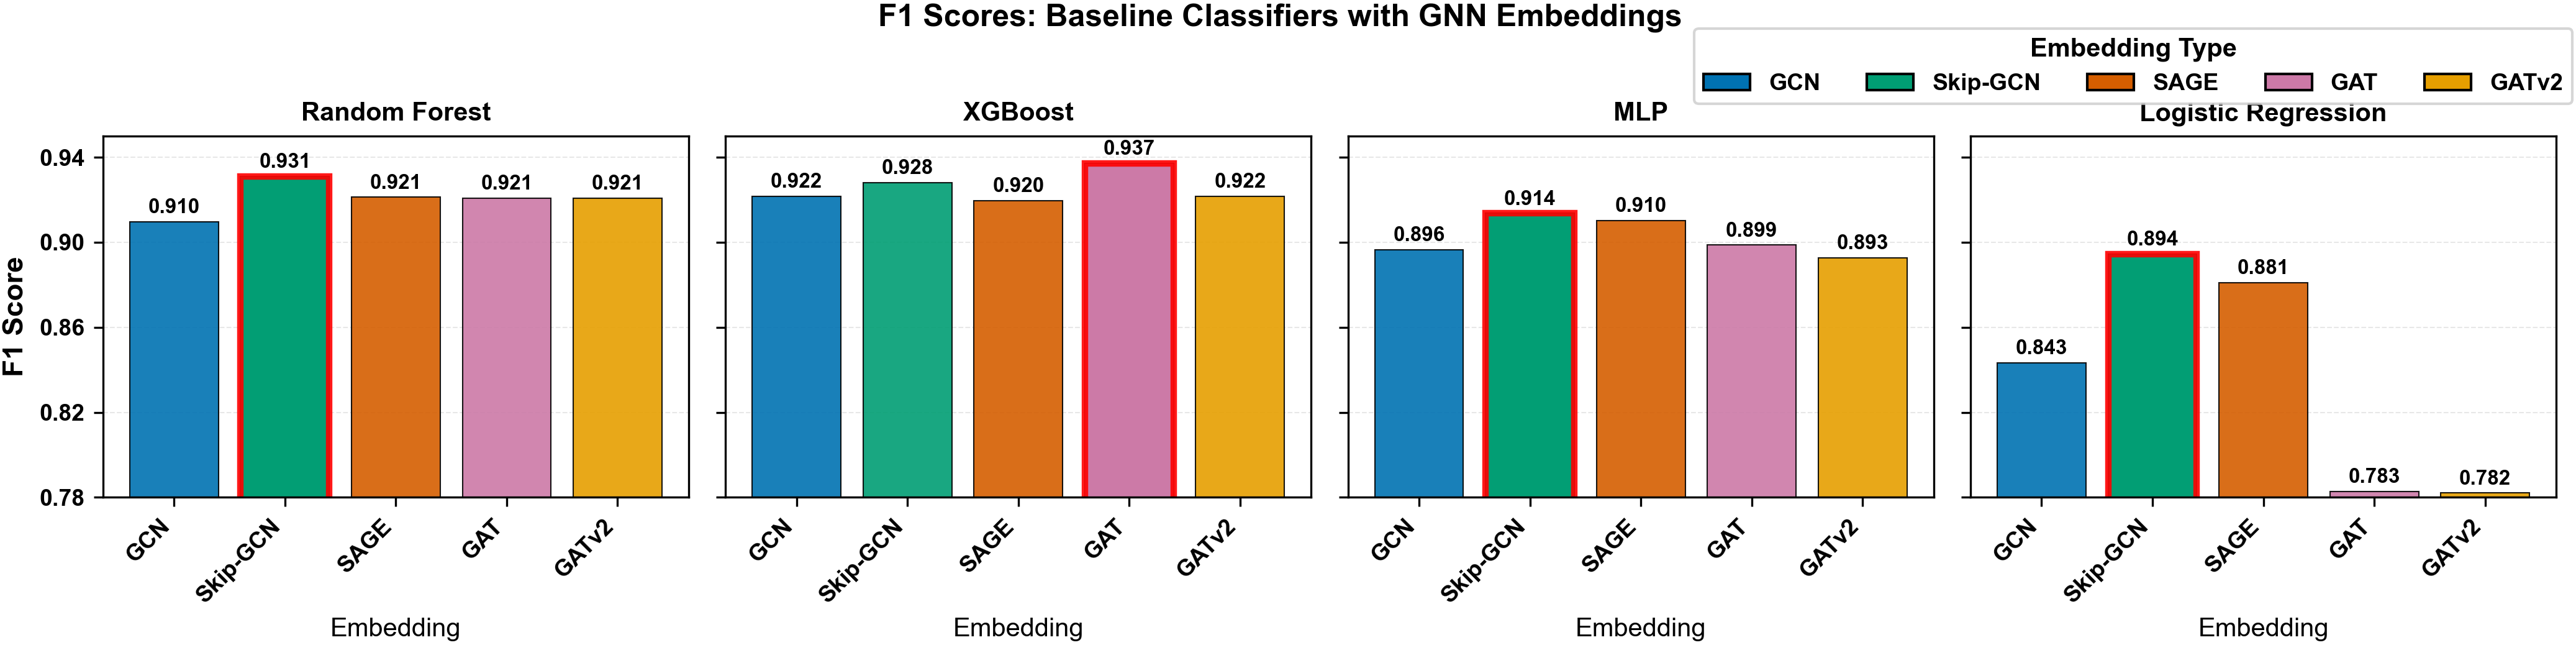


=== F1 Score Summary ===
Overall range: 0.782 - 0.937

Best embedding per baseline:
  Random Forest       : Skip-GCN (0.931)
  XGBoost             : GAT      (0.937)
  MLP                 : Skip-GCN (0.914)
  Logistic Regression : Skip-GCN (0.894)

Best baseline per embedding:
  GCN     : XGBoost              (0.922)
  Skip-GCN: Random Forest        (0.931)
  SAGE    : Random Forest        (0.921)
  GAT     : XGBoost              (0.937)
  GATv2   : XGBoost              (0.922)

=== Figure Captions ===

Heatmap caption:
Figure 1: F1 scores for four baseline classifiers (rows) combined with five GNN embedding methods (columns), with values annotated in each cell and best performance per baseline highlighted in red.

Grouped bars caption:
Figure 2: F1 scores across GNN embedding methods shown as grouped bar charts for each baseline classifier, with shared y-axis scale (0.78-0.95) and best embedding per baseline highlighted with red border.


In [206]:
"""
F1 Scores Visualization: Baselines × GNN Embeddings
Two publication-ready options: Heatmap (primary) and Grouped Bar Charts (alternative)
"""

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Set style for publication quality
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['ytick.major.width'] = 0.8

# ==================== DATA ====================
baselines = ["Random Forest", "XGBoost", "MLP", "Logistic Regression"]
embeddings = ["GCN", "Skip-GCN", "SAGE", "GAT", "GATv2"]

f1_scores = {
    "Random Forest":       {"GCN": 0.9096, "Skip-GCN": 0.9310, "SAGE": 0.9212, "GAT": 0.9209, "GATv2": 0.9209},
    "XGBoost":             {"GCN": 0.9216, "Skip-GCN": 0.9281, "SAGE": 0.9197, "GAT": 0.9372, "GATv2": 0.9217},
    "MLP":                 {"GCN": 0.8964, "Skip-GCN": 0.9136, "SAGE": 0.9102, "GAT": 0.8987, "GATv2": 0.8928},
    "Logistic Regression": {"GCN": 0.8434, "Skip-GCN": 0.8944, "SAGE": 0.8811, "GAT": 0.7827, "GATv2": 0.7820},
}

# Convert to matrix for heatmap
matrix = np.array([[f1_scores[b][e] for e in embeddings] for b in baselines])

# ==================== OPTION 1: HEATMAP (PRIMARY) ====================
def create_heatmap():
    """
    Create a 2D heatmap of F1 scores with baselines as rows and embeddings as columns.
    Uses viridis colormap (perceptually uniform and colorblind-safe).
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Create heatmap with viridis (colorblind-safe, perceptually uniform)
    im = ax.imshow(matrix, cmap='viridis', aspect='auto', vmin=0.78, vmax=0.95)
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(embeddings)))
    ax.set_yticks(np.arange(len(baselines)))
    ax.set_xticklabels(embeddings, fontsize=10)
    ax.set_yticklabels(baselines, fontsize=10)
    
    # Rotate the tick labels for better fit
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    
    # Add colorbar with proper label
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('F1 Score', rotation=270, labelpad=20, fontsize=11)
    cbar.ax.tick_params(labelsize=9)
    
    # Annotate each cell with the F1 value
    for i in range(len(baselines)):
        for j in range(len(embeddings)):
            value = matrix[i, j]
            # Choose text color based on background darkness
            text_color = 'white' if value < 0.87 else 'black'
            text = ax.text(j, i, f'{value:.3f}',
                          ha="center", va="center", color=text_color, fontsize=9)
    
    # Add grid for clarity (subtle)
    ax.set_xticks(np.arange(len(embeddings))-.5, minor=True)
    ax.set_yticks(np.arange(len(baselines))-.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.3, alpha=0.3)
    ax.tick_params(which="minor", size=0)
    
    # Labels and title
    ax.set_xlabel('GNN Embedding Type', fontsize=11, fontweight='bold')
    ax.set_ylabel('Baseline Classifier', fontsize=11, fontweight='bold')
#     ax.set_title('F1 Scores: Baseline Classifiers with GNN Embeddings', 
#                 fontsize=12, fontweight='bold', pad=15)
    
    # Highlight best score per row with a subtle border
    for i in range(len(baselines)):
        best_j = np.argmax(matrix[i])
        rect = Rectangle((best_j-0.48, i-0.48), 0.96, 0.96, 
                        linewidth=2, edgecolor='red', facecolor='none', alpha=0.7)
        ax.add_patch(rect)
    
    # --- legend outside with non-white background ---
    red_patch = mpatches.Patch(color='red', alpha=0.7, label='Best F1 per baseline')
    plt.tight_layout()
    fig.subplots_adjust(bottom=0.20)  # make space for the legend

    leg = fig.legend([red_patch], ['Best F1 per baseline'],
                     loc='lower left', bbox_to_anchor=(0.02, 0.02),
                     frameon=True, fancybox=True, framealpha=0.95)

    # style the legend background (non-white) and border
    leg.get_frame().set_facecolor('#f0f0f0')   # light grey background
    leg.get_frame().set_edgecolor('#444444')   # darker border
    leg.get_frame().set_linewidth(0.8)
    
    # Save high-res version
    fig.savefig("f1_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    return fig

# ==================== OPTION 2: GROUPED BAR CHARTS (ALTERNATIVE) ====================
def create_grouped_bars():
    """
    Create small-multiples grouped bar charts, one panel per baseline.
    Uses Okabe-Ito colorblind-safe palette for embedding types.
    """
    # Okabe-Ito colorblind-safe palette
    colors = {
        "GCN":     "#0072B2",  # blue
        "Skip-GCN":"#009E73",  # green  
        "SAGE":    "#D55E00",  # vermilion
        "GAT":     "#CC79A7",  # pink
        "GATv2":   "#E69F00",  # orange
    }
    
    fig, axes = plt.subplots(1, 4, figsize=(14, 3.5), sharey=True)
    fig.suptitle('F1 Scores: Baseline Classifiers with GNN Embeddings', 
                 fontsize=12, fontweight='bold', y=1.02)
    
    for idx, (ax, baseline) in enumerate(zip(axes, baselines)):
        scores = [f1_scores[baseline][emb] for emb in embeddings]
        x_pos = np.arange(len(embeddings))
        
        # Create bars with consistent colors per embedding
        bars = ax.bar(x_pos, scores, 
                      color=[colors[emb] for emb in embeddings],
                      edgecolor='black', linewidth=0.5, alpha=0.9)
        
        # Add value labels on bars
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                   f'{score:.3f}', ha='center', va='bottom', fontsize=8)
        
        # Styling
        ax.set_ylim(0.78, 0.95)
        ax.set_xlabel('Embedding', fontsize=10)
        if idx == 0:
            ax.set_ylabel('F1 Score', fontsize=11, fontweight='bold')
        
        ax.set_title(baseline, fontsize=10, fontweight='bold')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(embeddings, rotation=45, ha='right', fontsize=9)
        
        # Subtle grid
        ax.grid(axis='y', linestyle='--', alpha=0.3, linewidth=0.5)
        ax.set_axisbelow(True)
        
        # Highlight the best score
        best_idx = np.argmax(scores)
        ax.bar(best_idx, scores[best_idx], 
               color=colors[embeddings[best_idx]], 
               edgecolor='red', linewidth=2.5, alpha=0.9)
    
    # Shared y-axis ticks
    for ax in axes:
        ax.set_yticks([0.78, 0.82, 0.86, 0.90, 0.94])
        ax.tick_params(axis='y', labelsize=9)
    
    # Create legend (outside plot area)
    legend_elements = [mpatches.Patch(facecolor=colors[emb], 
                                      edgecolor='black', 
                                      label=emb) for emb in embeddings]
    fig.legend(handles=legend_elements, title='Embedding Type',
              loc='upper right', bbox_to_anchor=(1.0, 1.0), 
              ncol=5, fontsize=9, title_fontsize=10)
    
    plt.tight_layout()
    
    # Save high-res version
    fig.savefig("f1_grouped_bars.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    return fig

# ==================== HELPER FUNCTION ====================
def print_summary_stats():
    """Print summary statistics for the data."""
    print("\n=== F1 Score Summary ===")
    print(f"Overall range: {matrix.min():.3f} - {matrix.max():.3f}")
    print("\nBest embedding per baseline:")
    for baseline in baselines:
        best_emb = max(embeddings, key=lambda e: f1_scores[baseline][e])
        best_score = f1_scores[baseline][best_emb]
        print(f"  {baseline:20s}: {best_emb:8s} ({best_score:.3f})")
    
    print("\nBest baseline per embedding:")
    for emb in embeddings:
        best_base = max(baselines, key=lambda b: f1_scores[b][emb])
        best_score = f1_scores[best_base][emb]
        print(f"  {emb:8s}: {best_base:20s} ({best_score:.3f})")

# ==================== MAIN EXECUTION ====================
def create_all_visualizations():
    """Create both visualization options and print summary."""
    print("Creating visualizations...")
    
    # Create primary option (heatmap)
    print("\n1. Creating heatmap (primary option)...")
    fig1 = create_heatmap()
    
    # Create alternative option (grouped bars)
    print("\n2. Creating grouped bar charts (alternative option)...")
    fig2 = create_grouped_bars()
    
    # Print summary statistics
    print_summary_stats()
    
    # Figure captions
    print("\n=== Figure Captions ===")
    print("\nHeatmap caption:")
    print("Figure 1: F1 scores for four baseline classifiers (rows) combined with five GNN embedding methods (columns), with values annotated in each cell and best performance per baseline highlighted in red.")
    
    print("\nGrouped bars caption:")
    print("Figure 2: F1 scores across GNN embedding methods shown as grouped bar charts for each baseline classifier, with shared y-axis scale (0.78-0.95) and best embedding per baseline highlighted with red border.")
    
    return fig1, fig2

# Run if executed directly
if __name__ == "__main__":
    fig_heatmap, fig_bars = create_all_visualizations()